<a href="https://colab.research.google.com/github/smkim0508/COS486-Notes/blob/main/COS486_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 2 Programs

#### Sungmin Kim

Problem 2 - The Chevreul illusion involves a visual stimulus with a staircase of luminance steps, as shown in the lecture slides.


a) Write Python code that creates a 2D array representing the visual stimulus, and displays the array as an image. Submit your code and the image that it generates.


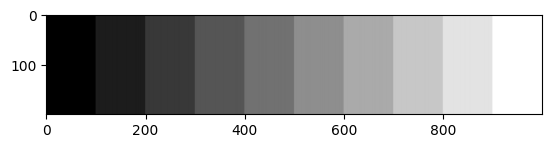

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

arr = []
height = 200
width = 1000
# define step to be uniformly increasing across step_size steps
step_size = 100
luminance_hi = 255
luminance_lo = 0
luminance_step = (luminance_hi - luminance_lo) / ((width // step_size) - 1)
curr_luminance = luminance_lo

# double loop and fill in luminance
for i in range(height):
  curr_luminance = luminance_lo
  inner_arr = []
  for j in range(width):
    if j > 0 and j % step_size == 0:
      curr_luminance += luminance_step
    inner_arr.append(curr_luminance)
  arr.append(inner_arr)

# print(arr)

img = np.array(arr)

plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.show()

b) Write code that makes a 1D array out of a row of your 2D array, and plots the 1D array. Submit your code and the graph that it generates.


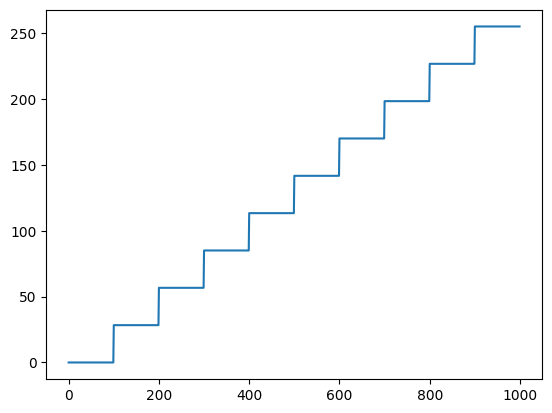

In [ ]:
# take one row and plot it
row = arr[0]

plt.plot(row)
plt.show()

Convolve the 1D array with the 1D kernel [–0.5, 1, -0.5], and plot the result. Submit your code and the graph that it generates.


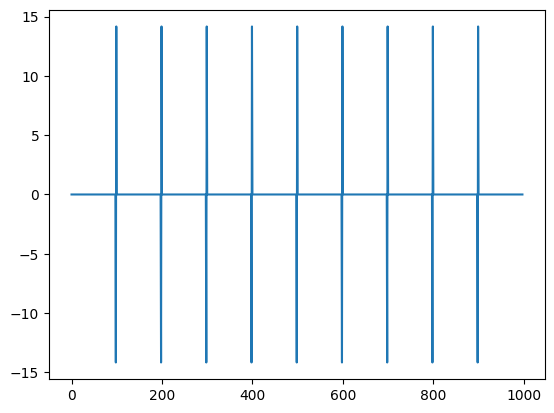

In [ ]:
# use np convolution
row = arr[0]
kernel = np.array([-0.5, 1, -0.5])
convolved = np.convolve(row, kernel, mode="valid") # drop the edges and convolve from idx 2 upto 998
plt.plot(convolved)
plt.show()
# NOTE: should create spikes at the boundaries due to weights cancelling to 0 when all 3 convolved pixels are equal
# when right > left = middle pixels, spike negative (due to * -0.5); similarly spike positive when right = middle > left pixel

What kernel should you use to model the Chevreul illusion? The output should have  Mach bands superimposed on a staircase. Convolve the 1D array with this kernel, and plot the result. Submit the kernel, your code and the graph that it generates.

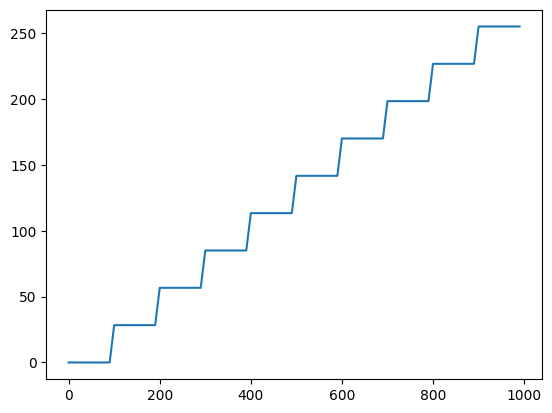

In [ ]:
# to create the chevreul illusion, should have kernel that:
# 1) cancels out when flat
# 2) slowly increase on boundaries

# use a moving average to smoothen boundaries, where slope represents mach bands?
row = arr[0]
context_size = 10
kernel = np.ones(context_size) / context_size
convolved = np.convolve(row, kernel, mode="valid")

plt.plot(convolved)


Problem 3 - The Vasarely illusion involves a visual stimulus with nested squares of increasing luminance, as shown in the lecture slides.


Write Python code that creates a 2D array representing the visual stimulus, and displays the array as an image. Submit your code and the image that it generates.


In [49]:
import numpy as np
import matplotlib.pyplot as plt

# pass
# init 2D array of size NxN
N = 81
arr = [[0] * N for _ in range(N)]

# let N be odd s.t. center is well defined and at (N // 2) when 0 idx
center = (N // 2)

# helper to find the sq. distance from center, which is max(row_dist, col_dist)
def calculate_distance(row, col, center):
  return max(abs(row - center), abs(col - center))

# loop through array and calculate distance from center, which corresponds to luminance
for i in range(N):
  for j in range(N):
    distance = calculate_distance(i, j, center)
    # closer to distance = darker
    value = (distance / center * 255) # NOTE: divide by center to scale
    arr[i][j] = value

[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0], [255.0, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625, 248.625,

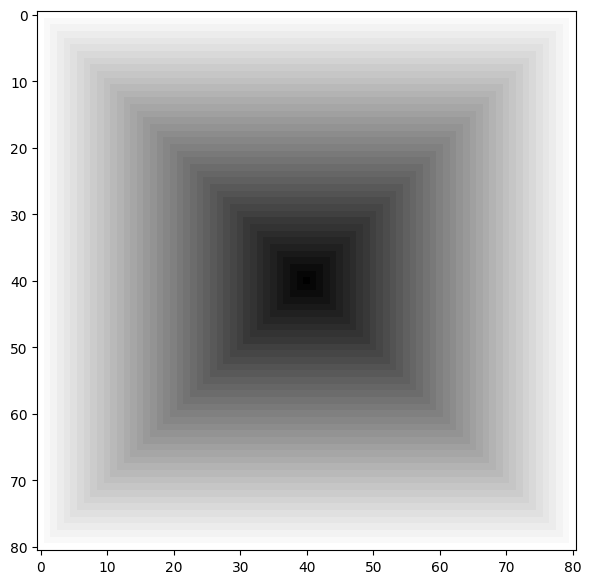

In [56]:
img = np.array(arr)
print(arr)
plt.figure(figsize=(10, 7))
plt.imshow(img, cmap="gray", vmin=0, vmax=255)

Model the illusion by convolving the 2D array with a 2D kernel that is 3×3 in size. Submit the kernel, your code, and the image that it generates.

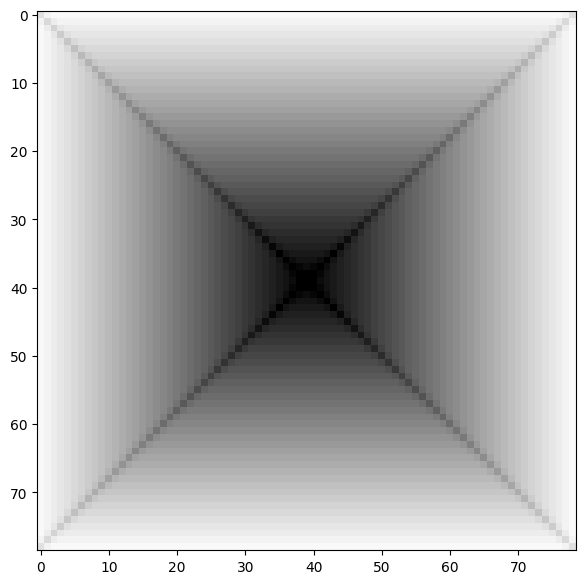

In [57]:
from scipy.signal import convolve2d

# define kernel to be center-surround structure
# emphasizes corner / diagonal, since there is highest positive value there compared to rest of the square perimeter
kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# use scale to tone down the emphasis
scale = 1
kernel = scale * kernel
kernel[1, 1] += 1 # add back original weight to center of kernel; without this, the center of kernel cancels out w/ surrounding values on perimeter

convolved = convolve2d(img, kernel, mode="valid")
plt.figure(figsize=(10, 7))
plt.imshow(convolved, cmap="gray", vmin=0, vmax=255)